# Covnet 

### Blog Post: https://medium.com/deep-learning-data-2040/two-class-image-classifications-using-convolutional-neural-nets-e203ba01d07f

In [1]:
import keras
keras.__version__

/Users/ejaekle/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [2]:
import os, shutil

In [4]:
#Dataset of both Marge and Homer images labele marge.number.jpg and homer.number.jpg
original_dataset_dir = '/Users/ejaekle/Desktop/simpsons'


# The directory where we will
# store our smaller dataset
base_dir = '/Users/ejaekle/Desktop/simpsons_small'
os.mkdir(base_dir)


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training homer pictures
train_homer_dir = os.path.join(train_dir, 'homer')
os.mkdir(train_homer_dir)

# Directory with our training marge pictures
train_marge_dir = os.path.join(train_dir, 'marge')
os.mkdir(train_marge_dir)

# Directory with our validation homer pictures
validation_homer_dir = os.path.join(validation_dir, 'homer')
os.mkdir(validation_homer_dir)

# Directory with our validation marge pictures
validation_marge_dir = os.path.join(validation_dir, 'marge')
os.mkdir(validation_marge_dir)

# Directory with our validation homer pictures
test_homer_dir = os.path.join(test_dir, 'homer')
os.mkdir(test_homer_dir)

# Directory with our validation marge pictures
test_marge_dir = os.path.join(test_dir, 'marge')
os.mkdir(test_marge_dir)

# Copy first 1000 Homer images to train_homer_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_homer_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 Homer images to validation_homer_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_homer_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 Homer images to test_homer_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_homer_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 Marge images to train_marge_dir
fnames = ['marge_{}.jpg'.format(i) for i in range(750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_marge_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 250 Marge images to validation_marge_dir
fnames = ['marge_{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_marge_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 Marge images to test_marge_dir
fnames = ['marge_{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_marge_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training homer images:', len(os.listdir(train_homer_dir)))

total training homer images: 750


In [6]:
print('total training marge images:', len(os.listdir(train_marge_dir)))

total training marge images: 750


In [7]:
print('total validation homer images:', len(os.listdir(validation_homer_dir)))

total validation homer images: 250


In [8]:
print('total validation marge images:', len(os.listdir(validation_marge_dir)))

total validation marge images: 250


In [9]:
print('total test homer images:', len(os.listdir(test_homer_dir)))

total test homer images: 250


In [10]:
print('total test marge images:', len(os.listdir(test_marge_dir)))

total test marge images: 250


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 90s 905ms/step - loss: 0.3618 - acc: 0.8255 - val_loss: 0.2286 - val_acc: 0.9180
Epoch 2/30
100/100 [==============================] - 87s 870ms/step - loss: 0.2253 - acc: 0.8990 - val_loss: 0.2160 - val_acc: 0.9260
Epoch 3/30
100/100 [==============================] - 86s 857ms/step - loss: 0.1898 - acc: 0.9205 - val_loss: 0.2030 - val_acc: 0.9340
Epoch 4/30
100/100 [==============================] - 86s 860ms/step - loss: 0.1535 - acc: 0.9390 - val_loss: 0.1958 - val_acc: 0.9340
Epoch 5/30
100/100 [==============================] - 84s 844ms/step - loss: 0.1273 - acc: 0.9500 - val_loss: 0.1809 - val_acc: 0.9480
Epoch 6/30
100/100 [==============================] - 88s 876ms/step - loss: 0.1098 - acc: 0.9570 - val_loss: 0.1759 - val_acc: 0.9480
Epoch 7/30
100/100 [==============================] - 86s 859ms/step - loss: 0.0802 - acc: 0.9740 - val_loss: 0.2192 - val_acc: 0.9380
Epoch 8/30
100/100 [==============================] - 8

In [17]:
model.save('simpsons_small_1.h5')

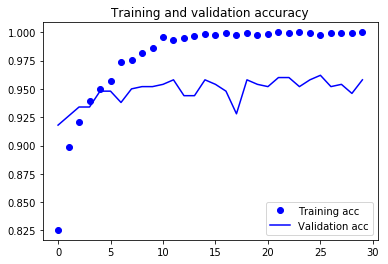

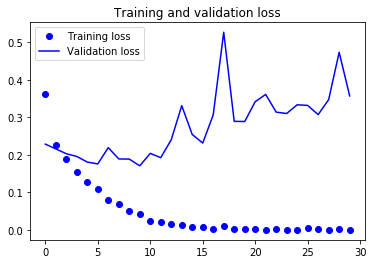

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

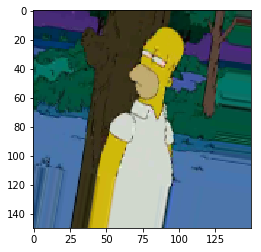

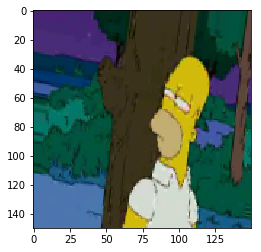

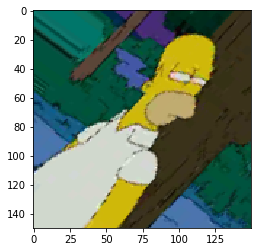

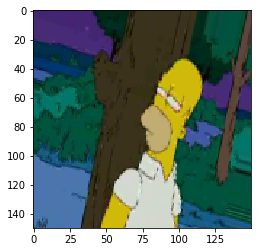

In [19]:
import matplotlib.pyplot as plt

# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_homer_dir, fname) for fname in os.listdir(train_homer_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 0.5264 - acc: 0.7411 - val_loss: 0.3091 - val_acc: 0.8721
Epoch 2/30
100/100 [==============================] - 152s 2s/step - loss: 0.3992 - acc: 0.8245 - val_loss: 0.2420 - val_acc: 0.9258
Epoch 3/30
100/100 [==============================] - 134s 1s/step - loss: 0.3526 - acc: 0.8494 - val_loss: 0.2365 - val_acc: 0.9354
Epoch 4/30
100/100 [==============================] - 134s 1s/step - loss: 0.3051 - acc: 0.8737 - val_loss: 0.2159 - val_acc: 0.9393
Epoch 5/30
100/100 [==============================] - 146s 1s/step - loss: 0.2812 - acc: 0.8846 - val_loss: 0.1774 - val_acc: 0.9469
Epoch 6/30
100/100 [==============================] - 145s 1s/step - loss: 0.2423 - acc: 0.9004 - val_loss: 0.2010 - val_acc: 0.9214
Epoch 7/30
100/100 [==============================] - 133s 1s/step - loss: 0.2197 - acc: 0.9108 - val_loss: 0.2179 - va

In [23]:
model.save('simpsons_small_2.h5')

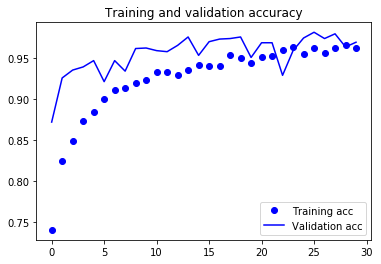

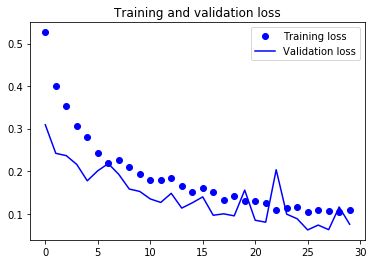

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()